[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fernigithub/series_temporales_101/blob/main/notebooks/Introduccion_series_temporales.ipynb)

# Introducción al analisis de series temporales

<img src="media/mgeo.png" style="width: 40%; display: block; margin: auto;">

## Introducción

En este curso cubriremos los siguientes temas:
- Definición de datos de series temporales.
- Introducción al análisis de series temporales y ejemplos de aplicaciones.
- Los principales componentes de una serie temporal.
- Descomposición de series temporales.


In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility

### ¿Qué es una serie temporal?

- Una serie temporal es una secuencia de puntos de datos organizados en orden temporal.
- Por lo general, la señal de tiempo se muestrea en puntos equidistantes en el tiempo.
- Estos pueden representarse como la secuencia de los valores muestreados.

<img src="media/ts_equal.png" style="width: 50%; display: block; margin: auto;">




- Las señales de tiempo muestreadas de forma irregular aún se pueden representar como una serie temporal.
- Es necesario codificar esta información adicional en una estructura de datos adicional.

<img src="media/ts_unequal.png" style="width: 50%; display: block; margin: auto;">


### ¿Qué datos se representan como series temporales?

- Las series temporales se encuentran en una miríada de fenómenos naturales, aplicaciones industriales y de ingeniería, negocios, actividades humanas, y más.


<img src="media/passengers.png" style="width: 70%; display: block; margin: auto;">

<img src="media/co2.png" style="width: 70%; display: block; margin: auto;">

<img src="media/sunspots.png" style="width: 70%; display: block; margin: auto;">

<img src="media/electricity.png" style="width: 70%; display: block; margin: auto;">

<img src="media/water_temps.png" style="width: 70%; display: block; margin: auto;">

- Otros ejemplos incluyen datos de:
    - Finanzas: precios de acciones, precios de activos, factores macroeconómicos.
    - Comercio electrónico: vistas de página, nuevos usuarios, búsquedas.
    - Negocios: transacciones, ingresos, niveles de inventario.
    - Ciencia de datos: series temporales generadas por modelos de aprendizaje automático.
    - IoT: sensores de temperatura, humedad, vibración, etc.
    - Ciencias de la Tierra: datos climáticos, datos de satélites, datos de sensores.
    - Sistemas de Información Geográfica: datos de series temporales de imágenes satelitales, movimiento de vehículos, etc.

### Análisis de series temporales

Los principales propósitos del análisis de series temporales son:
1. **Comprender** y caracterizar el proceso subyacente que genera los datos observados.
2. **Predecir** la evolución del proceso, es decir, predecir los próximos valores observados.



- Hay dos perspectivas principales para analizar una serie temporal.
- Cada perspectiva conduce a diferentes enfoques de análisis de series temporales.


#### Perspectiva estadística

- Una serie temporal es una secuencia de *variables aleatorias* que tienen alguna correlación u otra relación de distribución entre ellas.
- La secuencia es una realización (valores observados) de un proceso estocástico.
- Los enfoques estadísticos de series temporales se centran en encontrar los parámetros del proceso estocástico que más probablemente produjeron la serie temporal observada.

<img src="media/random_var.png" style="width: 30%; display: block; margin: auto;">


#### Perspectiva del sistema dinámico

- Esta perspectiva asume que hay un sistema gobernado por variables desconocidas $\{x_1, x_2, x_3, \dots ,x_𝑁\}$.
- Generalmente, solo observamos una serie temporal $y$ generada por el sistema.
- ¿Qué puede ser $y$?
    - Una de las variables del sistema.
    - Una función $f$ de las variables del sistema.
- El objetivo del análisis es reconstruir la dinámica de todo el sistema a partir de $y$.


<img src="media/partial.png" style="width: 30%; display: block; margin: auto;">


## Componentes de una serie temporal


- Una serie temporal a menudo se asume que está compuesta por tres componentes:
    - *Tendencia*: la dirección a largo plazo.
    - *Estacionalidad*: el comportamiento periódico.
    - *Residuos*: las fluctuaciones irregulares.


- La tendencia captura la dirección general de la serie temporal.
- Por ejemplo, el aumento del número de pasajeros a lo largo de los años a pesar de las fluctuaciones estacionales.
- La tendencia puede ser creciente, decreciente o constante.
- Puede aumentar/disminuir de diferentes formas a lo largo del tiempo (linealmente, exponencialmente, etc...).

<img src="media/passengers_trend.png" style="width: 70%; display: block; margin: auto;">


- Creemos una tendencia desde cero para entender cómo se ve.


In [3]:
time = np.arange(144)
trend = time * 2.65 +100

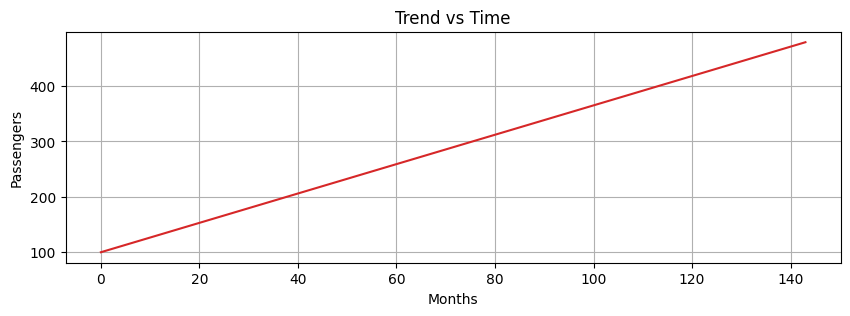

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Trend vs Time");

### Estacionalidad

- Las fluctuaciones periódicas en los datos de series temporales que ocurren a intervalos regulares debido a factores estacionales.
- Se caracteriza por patrones consistentes y predecibles durante un período específico (por ejemplo, diario, mensual, trimestral, anual).


Puede ser impulsado por muchos factores.
- Eventos naturales como fluctuaciones climáticas causadas por la época del año.
- Procedimientos comerciales o administrativos, como el inicio y fin de un año escolar.
- Comportamiento social o cultural, por ejemplo, días festivos u observancias religiosas.



- Generemos el componente estacional.

In [5]:
seasonal = 20 + np.sin( time * 0.5) * 20

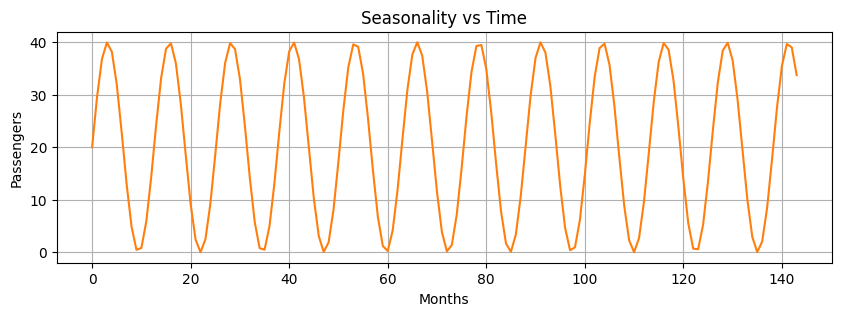

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Seasonality vs Time");

### Residuos

- Los residuos son las fluctuaciones aleatorias que quedan después de eliminar la tendencia y la estacionalidad de la serie temporal original.
- No se debería observar una tendencia o un patrón estacional en los residuos.
- Representan fluctuaciones a corto plazo, bastante impredecibles.




In [7]:
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

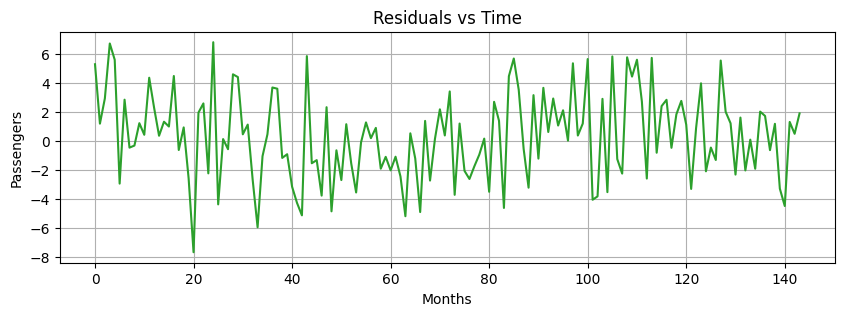

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, residuals, color='tab:green')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Residuals vs Time");

---

## Descomposicioón de series temporales

- Los componentes de las series temporales se pueden descomponer con los siguientes modelos:
    1. Descomposición aditiva
    2. Descomposición multiplicativa
    3. Descomposición pseudoaditiva

### Modelos aditivos

- Los modelos aditivos asumen que la serie temporal observada es la suma de sus componentes:

$$X(t) = T(t) + S(t) + R(t)$$

- donde
    - $X(t)$ es la serie temporal
    - $T(t)$ es la tendencia
    - $S(t)$ es la estacionalidad
    - $R(t)$ es el residuo
- Los modelos aditivos se utilizan cuando las magnitudes de los valores estacionales y residuales no dependen del nivel de la tendencia.



In [9]:
additive = trend + seasonal + residuals

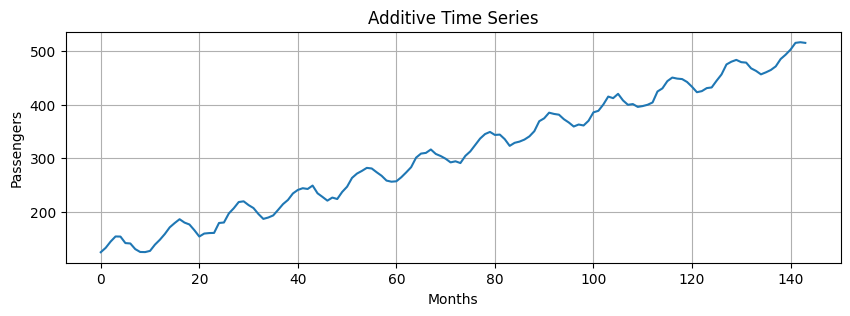

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Additive Time Series")
plt.grid();

### Modelos multiplicativos

- Asume que la serie temporal observada es el producto de sus componentes:

$$X(t) = T(t) \cdot S(t) \cdot R(t)$$

- Es posible transformar un modelo multiplicativo en uno aditivo aplicando una transformación logarítmica:

$$\log \left( T(t) \cdot S(t) \cdot R(t) \right) = \log(T(t)) + \log(S(t)) + \log(R(t))$$

- Los modelos multiplicativos se utilizan cuando las magnitudes de los valores estacionales y residuales dependen de la tendencia.


In [11]:
multiplicative = trend * seasonal # we do not include the residuals to make the pattern more clear

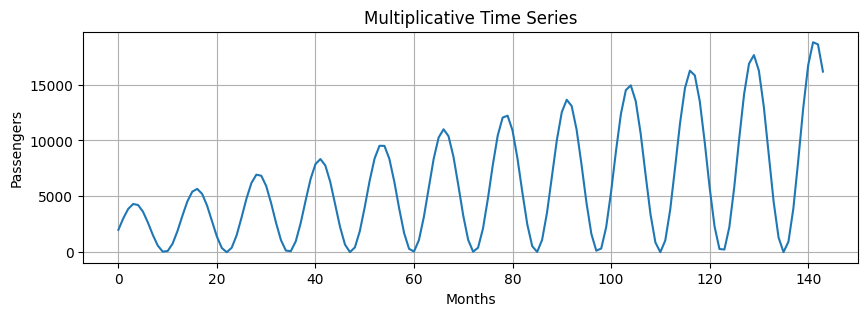

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Multiplicative Time Series")
plt.grid();

### Modelos pesudoaditivos

- Los modelos pseudoaditivos combinan elementos de los modelos aditivos y multiplicativos.
- Útil cuando:
    - Los valores de la serie temporal están cerca o son iguales a cero. Los modelos multiplicativos tienen problemas con los valores cero, pero aún necesita modelar la estacionalidad multiplicativa.
    - Algunas características son multiplicativas (por ejemplo, efectos estacionales) y otras son aditivas (por ejemplo, residuos).
    - Patrones estacionales complejos o datos que no se alinean completamente con el modelo aditivo o multiplicativo.


- Por ejemplo, este modelo es particularmente relevante para modelar series que:
    - dependen extremadamente del clima,
    - tienen fluctuaciones estacionales marcadamente pronunciadas y movimientos de tendencia-ciclo.
- Formulación:

$$X(t) = T(t) + T(t)\cdot(S(t) - 1) + T(t)\cdot(R(t) - 1) = T(t)\cdot(S(t) + R(t) -1)$$


In [13]:
pseudoadditive = trend * (seasonal + residuals - 1)

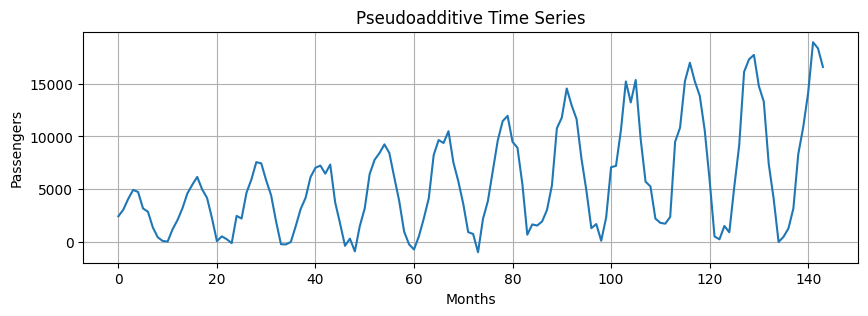

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, pseudoadditive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Pseudoadditive Time Series")
plt.grid();

---

## Descomposición de series temporales

- Ahora vamos a cambiar de dirección.
- Tenemos datos aditivos y multiplicativos.
- Vamos a descomponerlos en sus tres componentes.

- Un enfoque muy simple, pero a menudo útil, es estimar una tendencia *lineal*.
- Una serie temporal *detrended* se obtiene restando la tendencia lineal de los datos.
- La tendencia lineal se calcula como un polinomio de primer orden.

In [15]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
trend = np.arange(len(additive)) * slope + intercept # linear trend
detrended = additive - trend # remove the trend

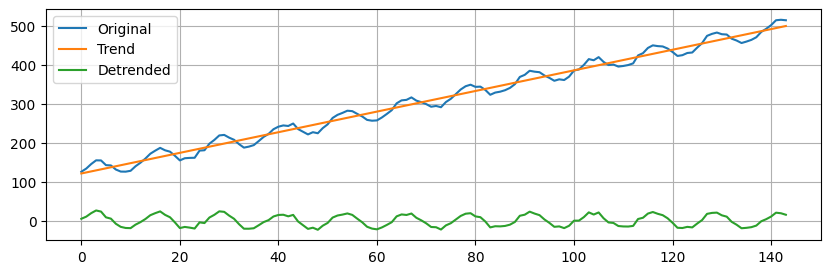

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Vamos a usar `seasonal_decompose` (más información [aquí](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) para aislar los principales componentes de la serie temporal.
- Este es un método simple que requiere que especifiquemos el tipo de modelo (aditivo o multiplicativo) y el período principal.


### Descomposicion Aditiva

- Necesitamos especificar un entero que represente la estacionalidad principal de los datos.
- Al observar el componente estacional, vemos que el período es *aproximadamente* de $12$ pasos de tiempo.
- Por lo tanto, establecemos `period=12`.

In [17]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)

In [18]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

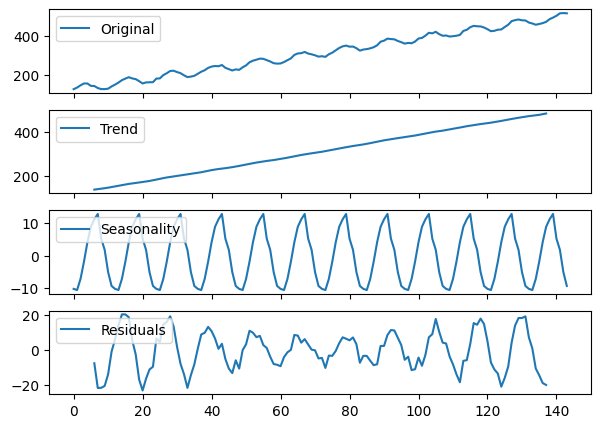

In [19]:
seas_decomp_plots(additive, additive_decomposition)

- La linea azul en cada gráfico representa la descomposición.
- Hay una leyenda en la esquina superior izquierda de cada gráfico para informarle qué representa cada gráfico.
- Puede ver que la descomposición no es perfecta en cuanto a estacionalidad y residuos, pero es bastante cercana.

- Como se habran dado cuenta, tanto la *tendencia* como los *residuos* faltan datos al principio y al final.
- Esto se debe a cómo se calcula la tendencia (más allá del alcance de esta lección).
- Los residuos faltan simplemente porque $R_{t} = Y_{t} - T_{t} - S_{t}$, por lo que los valores de tendencia faltantes significan valores residuales faltantes también.
- En otras palabras, no hay nada malo con estos gráficos.

### Descomposición Multiplicativa

- Usamos la misma función que antes, pero en la serie temporal `multiplicativa`.
- Dado que sabemos que esta es una serie temporal multiplicativa, declaramos `model='multiplicative'` en `seasonal_decompose`.

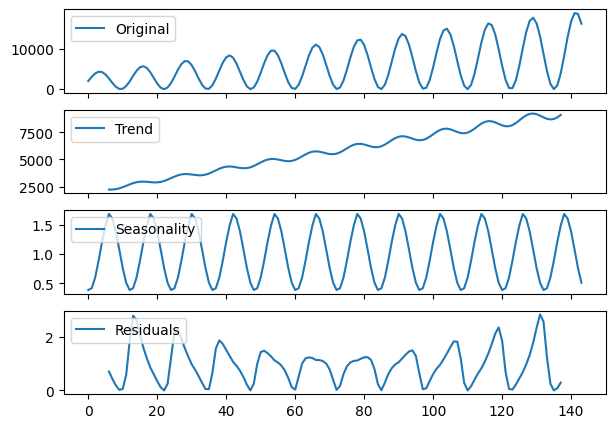

In [20]:
multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
seas_decomp_plots(multiplicative, multiplicative_decomposition)

- Nuevamente, la descomposición hace un trabajo relativamente bueno al captar la tendencia general y la estacionalidad.
- Podemos ver que las formas siguen los patrones que esperamos.


### Locally estimated scatterplot smoothing (LOESS)
- Vamos a intentar un segundo método llamado `STL` (Descomposición estacional y de tendencia usando LOESS).
- Comenzamos con el modelo aditivo.

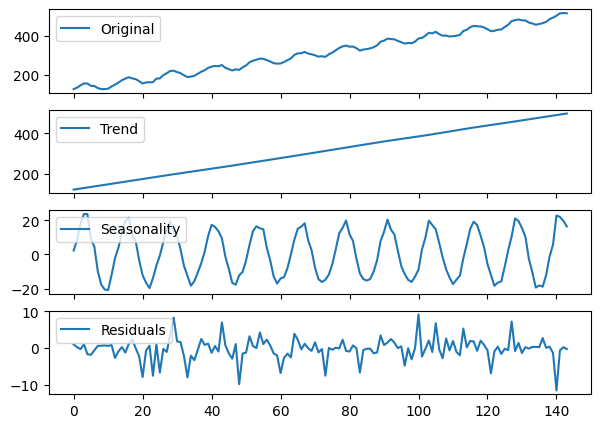

In [21]:
stl_decomposition = STL(endog=additive, period=12, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

- La descomposición STL hace un buen trabajo en la serie temporal 'aditiva'.
- A continuación, probamos con la serie temporal 'multiplicativa'.

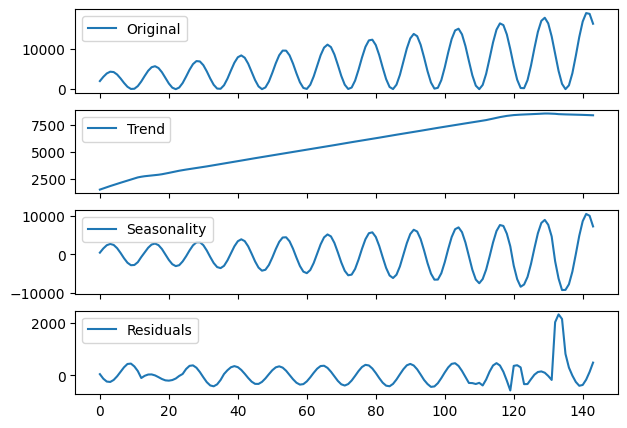

In [22]:
stl_decomposition = STL(endog=multiplicative, period=12, robust=True).fit()
seas_decomp_plots(multiplicative, stl_decomposition)

- Esta descomposición no es tan buena como la anterior.

### Cual método es mejor?

Use ``Descomposición estacional`` cuando:

- Sus datos de series temporales tienen un patrón estacional y una tendencia claros y estables.
- Prefiere un modelo más simple con menos parámetros para ajustar.
- La amplitud estacional es constante en el tiempo (sugiere un modelo aditivo) o varía proporcionalmente con la tendencia (sugiere un modelo multiplicativo).


Use ``STL`` cuando:

- Su serie temporal exhibe estacionalidad compleja que puede cambiar con el tiempo.
- Necesita manejar los valores atípicos de manera efectiva sin que distorsionen las tendencias y los componentes estacionales.
- Está tratando con tendencias y estacionalidades no lineales y necesita más control sobre el proceso de descomposición.

## Identificar el periodo/frecuencia dominante

- ``seasonal_decompose`` espera el período dominante como parámetro.
- En este ejemplo, generamos el componente ``seasonal`` a mano de la siguiente manera:

````python
seasonal = 20 + np.sin( time * 0.5) * 20
````

- Dijimos que el período era *aproximadamente* $12$.
- Pero, en general, ¿cómo lo averiguamos 🤔?

- Se puede usar una de las siguientes técnicas:
    - Grafique los datos e intente averiguar después de cuántos pasos se repite el ciclo.
    - Haga un gráfico de autocorrelación (más sobre esto más adelante).
    - Use la Transformada Rápida de Fourier en una señal *sin* tendencia.

- Veremos más sobre FFT más adelante.
- Por ahora, puede usar la siguiente función para calcular el período dominante en los datos.

In [23]:
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

In [26]:
seasonal = 20 + np.sin( time * 0.5) * 20
period, freqs, magnitudes = fft_analysis(seasonal)

Dominant Frequency: 0.076
Dominant Period: 13.09 time units


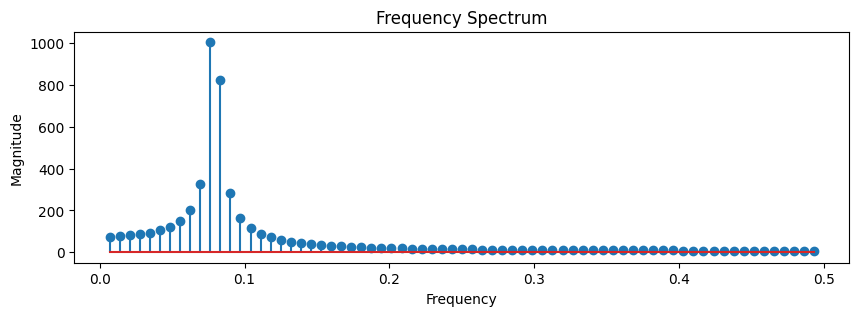

In [27]:
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()